In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')



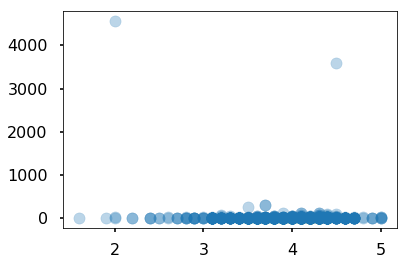

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In [3]:
skincare_data = pd.read_csv("00. InfoProduct.csv")
#skincare_data = skincare_data['Reviewer'].drop()

skincare_data=skincare_data.drop(['Reviewer'], axis=1)

#lowercase column titles
new_colnames = [i.lower() for i in skincare_data.columns]
skincare_data=skincare_data.copy()
skincare_data.columns=new_colnames

#Price: Rp --> USD
skincare_data['price'] = skincare_data['price'].str.replace('Rp.', '')
skincare_data['price'] = skincare_data['price'].str.replace('.','')
skincare_data['price'] = skincare_data['price'].astype(float)
skincare_data["price"] = 0.00007 * skincare_data["price"]


#categorize columns by Category
#categorize by Merk
#rename merk --> brand
skincare_data = skincare_data.rename(columns = {"merk" : "brand"})
skincare_data = skincare_data.rename(columns = {"overallrating" : "rating"})
skincare_data.head()
#groupby brands
brands_group=skincare_data.groupby('brand')['rating'].mean()
#average ratings per Category/Merk
    #boxplots
    
#plot=skincare_data.boxplot('rating', by='brand')
plt.scatter(x=skincare_data['rating'],y=skincare_data["price"], alpha=0.3)
plt.show()
    
skincare_data.head()


In [ ]:
skincare_subset=skincare_data.loc[(skincare_data['price']<40)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()


In [ ]:
plot=skincare_subset.boxplot('price', by='category', rot=90)
skincare_data['category'].unique()
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')

In [ ]:
plot=skincare_subset.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()